In [1]:
import pandas as pd
import numpy as np
import re
from experiment_utils import get_latest_files
from post_processing import series_name, error_estimation, merge_estimates_true, compute_val_metrics, under_over_analysis, under_over_by_method, val_metrics_per_iteration, boxplots, boxplots_per_iteration, add_weights, exponential_weights_paper

Functions

In [2]:
def clean_filename(filepath):
    filename = filepath.split('/')[-1]
    
    filename = filename.rsplit('.', 1)[0]
    
    # Check if the filename ends with a date in the format DDMMYYYY or similar
    # and remove the date if it exists
    filename = re.sub(r'_\d{8}$', '', filename)
    
    return filename

def clean_method(method_str):
    parts = method_str.split('.')
    if len(parts) > 3:
        method_name = parts[3].split()[0]
    else:
        method_name = parts[-1].split()[0]
    return method_name

# Real Data

## Saúde

In [26]:
saude = pd.read_csv(get_latest_files('results/saude', 'table_A'), dtype={'column_index': 'string'})
saude['filename'] = saude['filename'].apply(clean_filename)
saude['method'] = saude['method'].apply(clean_method)
saude = series_name(saude)
saude

,series,method,iteration,model,mse,mae,rmse
0,covid19_0,Holdout,0,Tree,1122.564394,20.017677,33.504692
1,covid19_0,Holdout,0,ARMA,1097.670935,20.360957,33.131117
2,covid19_0,Repeated_Holdout,0,Tree,197.821429,8.396104,14.064901
3,covid19_0,Repeated_Holdout,0,ARMA,4652.950871,64.066829,68.212542
4,covid19_0,Repeated_Holdout,1,Tree,182.480132,8.099338,13.508521
...,...,...,...,...,...,...,...
3349,pharma_sales_7,MarkovCV,7,ARMA,185.397859,10.932176,13.616088
3350,pharma_sales_7,MarkovCV,8,Tree,161.017222,10.094444,12.689256
3351,pharma_sales_7,MarkovCV,8,ARMA,167.622937,9.967049,12.946928
3352,pharma_sales_7,MarkovCV,9,Tree,147.507895,8.700000,12.145283


In [14]:
saude_test = pd.read_csv(get_latest_files('results/saude', 'table_B'), dtype={'column_index': 'string'})
saude_test['filename'] = saude_test['filename'].apply(clean_filename)
saude_test = series_name(saude_test)
saude_test

,series,model,mse,mae,rmse
0,covid19_0,Tree,17.316252,2.493517,4.161280
1,covid19_0,ARMA,35.113134,5.037637,5.925634
2,covid19_1,Tree,5.463435,1.555446,2.337399
3,covid19_1,ARMA,14.434002,3.375995,3.799211
4,covid19_2,Tree,8.104641,1.812699,2.846865
...,...,...,...,...,...
81,pharma_sales_5,ARMA,7.881308,2.276249,2.807367
82,pharma_sales_6,Tree,1112.268505,26.203030,33.350690
83,pharma_sales_6,ARMA,1315.904665,27.406627,36.275400
84,pharma_sales_7,Tree,151.760911,10.039727,12.319128


In [27]:
saude = add_weights(saude,preq_methods = ['Growing_Window', 'Rolling_Window'], CV_methods = ['Block_CV', 'AdaptedhvBlockCV', 'MarkovCV'])
saude

,series,method,iteration,model,mse,mae,rmse,weights
0,covid19_0,Holdout,0,Tree,1122.564394,20.017677,33.504692,1.000000
1,covid19_0,Holdout,0,ARMA,1097.670935,20.360957,33.131117,1.000000
2,covid19_0,Repeated_Holdout,0,Tree,197.821429,8.396104,14.064901,1.000000
3,covid19_0,Repeated_Holdout,0,ARMA,4652.950871,64.066829,68.212542,1.000000
4,covid19_0,Repeated_Holdout,1,Tree,182.480132,8.099338,13.508521,1.000000
...,...,...,...,...,...,...,...,...
6445,pharma_sales_7,Rolling_Window_with_weights,3,ARMA,218.340356,11.103677,14.776344,0.266667
6446,pharma_sales_7,Rolling_Window_with_weights,1,Tree,106.902369,8.041705,10.339360,0.066667
6447,pharma_sales_7,Rolling_Window_with_weights,1,ARMA,148.758783,8.353555,12.196671,0.066667
6448,pharma_sales_7,Rolling_Window_with_weights,2,Tree,105.977119,8.028140,10.294519,0.133333


In [28]:
est_saude = error_estimation(saude)

In [32]:
estimates = merge_estimates_true(est_saude, saude_test)
estimates

,series,method,model,mse_estimate,mae_estimate,mse_true,mae_true,rmse
0,covid19_0,AdaptedhvBlockCV,ARMA,742.978850,17.424497,35.113134,5.037637,5.925634
1,covid19_0,AdaptedhvBlockCV,Tree,203.562650,8.022051,17.316252,2.493517,4.161280
2,covid19_0,AdaptedhvBlockCV_with_weights,ARMA,1502.029628,31.115459,35.113134,5.037637,5.925634
3,covid19_0,AdaptedhvBlockCV_with_weights,Tree,261.333575,8.834274,17.316252,2.493517,4.161280
4,covid19_0,AdaptedhvBlockCV_with_weights_paper,ARMA,1417.738479,29.721346,35.113134,5.037637,5.925634
...,...,...,...,...,...,...,...,...
1285,pharma_sales_7,Repeated_Holdout,Tree,112.674209,7.829203,151.760911,10.039727,12.319128
1286,pharma_sales_7,Rolling_Window,ARMA,154.109400,9.124550,162.831063,9.657397,12.760528
1287,pharma_sales_7,Rolling_Window,Tree,102.540055,7.741895,151.760911,10.039727,12.319128
1288,pharma_sales_7,Rolling_Window_with_weights,ARMA,181.270227,9.936330,162.831063,9.657397,12.760528


In [41]:
compute_val_metrics(estimates, 'mse')

,Mean,Median,1st_Quartile,3rd_Quartile,Minimum,Maximum,Standard_deviation,method,model,metric
0,13977.684517,17.546466,0.076972,638.378897,-1461.952581,5.186489e+05,78027.076497,AdaptedhvBlockCV,ARMA,PAE
1,14092.260493,28.531119,2.227763,798.425151,0.032328,5.186489e+05,78006.464638,AdaptedhvBlockCV,ARMA,APAE
2,2.290013,1.111194,0.007534,1.825120,-0.977060,2.015957e+01,4.391823,AdaptedhvBlockCV,ARMA,RPAE
3,2.602089,1.111194,0.673435,1.825120,0.004109,2.015957e+01,4.214427,AdaptedhvBlockCV,ARMA,RAPAE
4,12571.731678,5.936017,-1.037140,112.100716,-621.890085,5.268196e+05,79372.815867,AdaptedhvBlockCV,Tree,PAE
...,...,...,...,...,...,...,...,...,...,...
115,3.971846,1.241848,0.564822,3.246252,0.082549,2.796980e+01,6.761073,Rolling_Window_with_weights,ARMA,RAPAE
116,36880.071043,19.958426,-0.088110,711.215445,-578.330126,1.537512e+06,231572.233902,Rolling_Window_with_weights,Tree,PAE
117,36938.798892,65.003316,3.686536,711.215445,0.063832,1.537512e+06,231562.873300,Rolling_Window_with_weights,Tree,APAE
118,344.139441,2.066936,-0.181374,7.392538,-0.965510,5.441404e+03,1112.836381,Rolling_Window_with_weights,Tree,RPAE


In [44]:
under_over_analysis(estimates, 'mse')

(           Mean    Median  1st_Quartile  3rd_Quartile      Minimum  \
 0   -223.943953 -2.454681    -40.204254     -0.515057 -1461.952581   
 1    223.943953  2.454681      0.515057     40.204254     0.032328   
 2     -0.609967 -0.620901     -0.880871     -0.487576    -0.977060   
 3      0.609967  0.620901      0.487576      0.880871     0.004109   
 4   -119.144254 -4.477205    -54.466355     -1.037140  -621.890085   
 ..          ...       ...           ...           ...          ...   
 115    0.562999  0.559003      0.366171      0.729519     0.140273   
 116 -105.220730 -1.232310    -42.198631     -0.386341  -578.330126   
 117  105.220730  1.232310      0.386341     42.198631     0.063832   
 118   -0.500496 -0.436305     -0.663494     -0.305021    -0.965510   
 119    0.500496  0.436305      0.305021      0.663494     0.134778   
 
          Maximum  Standard_deviation   N      %                       method  \
 0      -0.032328          465.140706  11  25.58             Adap

In [43]:
under_over_by_method(estimates, 'mse')

(          Mean     Median  1st_Quartile  3rd_Quartile      Minimum  \
 0  -163.482588  -4.244998    -47.271194     -0.798329 -1461.952581   
 1   163.482588   4.244998      0.798329     47.271194     0.032328   
 2    -0.578970  -0.554619     -0.860369     -0.314708    -0.988433   
 3     0.578970   0.554619      0.314708      0.860369     0.004109   
 4  -162.693456  -2.038089    -49.212761     -0.464738 -1448.084411   
 5   162.693456   2.038089      0.464738     49.212761     0.027394   
 6    -0.532944  -0.497451     -0.744825     -0.357334    -0.969314   
 7     0.532944   0.497451      0.357334      0.744825     0.002913   
 8  -157.665421 -11.647175    -75.178140     -0.551191 -1446.981316   
 9   157.665421  11.647175      0.551191     75.178140     0.027888   
 10   -0.503468  -0.476790     -0.702313     -0.289334    -0.971225   
 11    0.503468   0.476790      0.289334      0.702313     0.013458   
 12 -177.807735  -2.516089    -46.320922     -0.764882 -1461.931303   
 13  1

In [55]:
iteration_data = pd.merge(left=saude, right=saude_test, on=["model", "series"], suffixes=["_estimate", "_true"]);

In [50]:
val_metrics_per_iteration(iteration_data, 'mse', methods_list=['Rolling_Window_with_weights'])

method model iteration           PAE            \
                                                        mean    median   
0  Rolling_Window_with_weights  ARMA         1  23787.774211  0.737434   
1  Rolling_Window_with_weights  ARMA         2  24724.251042  6.472766   
2  Rolling_Window_with_weights  ARMA         3  50181.588471  2.427464   
3  Rolling_Window_with_weights  Tree         1  25484.458471  3.531442   
4  Rolling_Window_with_weights  Tree         2  27573.787645  2.351342   
5  Rolling_Window_with_weights  Tree         3  51884.160727  3.407353   

                                                       APAE             ...  \
             min           max            std          mean     median  ...   
0 -176791.928816  1.824623e+06  197894.302103  28156.657546  37.291531  ...   
1 -169962.484297  2.081871e+06  225361.260503  28860.259931  67.701139  ...   
2   -5122.364275  2.097452e+06  319780.711635  50866.517482  55.509293  ...   
3    -644.967412  1.924007e+06  207324.335603  25561.380437  45.210885  ...   
4    -668.627517  2.252232e+06  242810.058791  27657.267436  23.957218  ...   
5    -541.045948  2.195719e+06  334736.346399  51960.872413  18.783844  ...   

          RPAE                                                       RAPAE  \
          mean    median       min           max          std         mean   
0     2.689943  0.159121 -1.000000     45.084122     7.092004     3.294324   
1     3.791443  0.760954 -1.000000     47.097353     8.809549     4.193350   
2     4.138552  0.340901 -0.926012     37.727869     8.916067     4.542757   
3  1650.334432  0.812562 -1.000000  28913.605399  5590.694954  1650.848747   
4    29.516147  1.136836 -1.000000   1458.328237   163.953589    29.977781   
5     5.665239  1.108295 -0.942517     73.513883    13.603055     5.971741   

                                                  
     median       min           max          std  
0  0.957173  0.017360     45.084122     6.829142  
1  0.952851  0.081426     47.097353     8.623297  
2  0.816022  0.066178     37.727869     8.712271  
3  1.000000  0.022342  28913.605399  5590.541319  
4  1.136836  0.017427   1458.328237   163.868825  
5  1.108295  0.020182     73.513883    13.468163  

[6 rows x 23 columns]

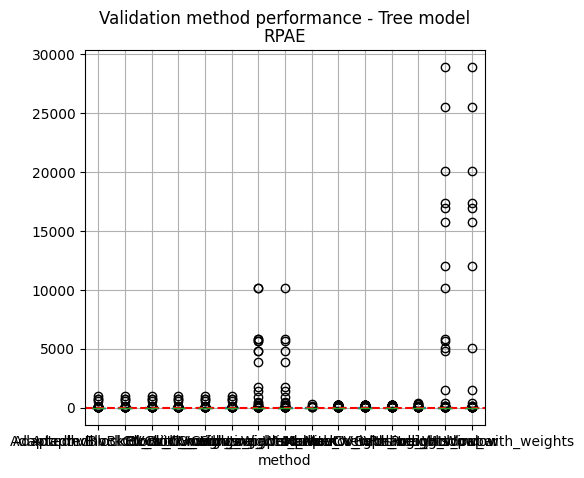

In [60]:
boxplots(iteration_data, "mse", "Tree", ["RPAE"], 5, 5);